# 📊 Executive Summary: Telecom Churn Prediction

## 🚀 Business Impact
Using a **Balanced Logistic Regression** model, we can now identify **80% of customers likely to churn** before they leave.
- **Revenue Saved:** Estimated **$7,830 per 1,400 customers** (after costs of retention).
- **Efficiency:** We are successfully identifying 4 out of 5 churners, allowing the marketing team to target retention offers effectively.

## 🔍 Top 3 Churn Drivers
1. **Contract Type:** Month-to-month contracts are the highest risk factor.
2. **Tenure:** New customers are significantly more likely to leave in the first 6 months.
3. **Monthly Charges:** Customers with bills over $70/month show a high churn probability.

## 💡 Key Recommendations
- **Incentivize Long-term Contracts:** Offer discounts for customers moving from monthly to 1 or 2-year contracts.
- **Onboarding Focus:** Implement a "First 6 Months" loyalty program to reduce early-tenure churn.
- **Fiber Optic Review:** Investigate why fiber optic customers churn more (Cost vs. Service Quality issues).


# Telecomm Customer Churn Prediction

##Project Overview

The objective of this project is to analyze customer behavior for a telecommunications company and build a predictive model to identify customers who are likely to churn (cancel their service). High churn rates directly affect revenue, so predicting it allows the company to take proactive retention measures.

##Workflow:
**Data Loading & Initial Inspection:** Understanding the raw data.

**Data Cleaning:** Correcting data types, handling missing values, and dropping unnecessary features.

**Exploratory Data Analysis (EDA):** Finding patterns through visualization.

**Feature Engineering & Encoding:** Converting categorical data into numerical format for the model.

**Model Training & Evaluation:** Building and testing machine learning models.

## Import Libraries and Load Data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  warnings import filterwarnings
filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('/content/Telcom Data.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Cleaning and Type Conversion

In [5]:
# 1. Check for missing values initially
print("Initial missing values:")
print(df.isnull().sum())

# 2. Convert TotalCharges to numeric.
# 'errors=coerce' will turn empty spaces into NaN (null) values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# 3. Check how many NaNs were created in TotalCharges
print(f"\nMissing values in TotalCharges after conversion: {df['TotalCharges'].isnull().sum()}")

# 4. Drop the rows with these missing values
df.dropna(inplace=True)

# 5. Drop the customerID column as it's not needed for the model
df.drop('customerID', axis=1, inplace=True)

# 6. Verify the final data types and that there are no nulls
print("\nFinal Data Summary:")
df.info()

Initial missing values:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Missing values in TotalCharges after conversion: 11

Final Data Summary:
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int6

## Exploratory Data Analysis (EDA)

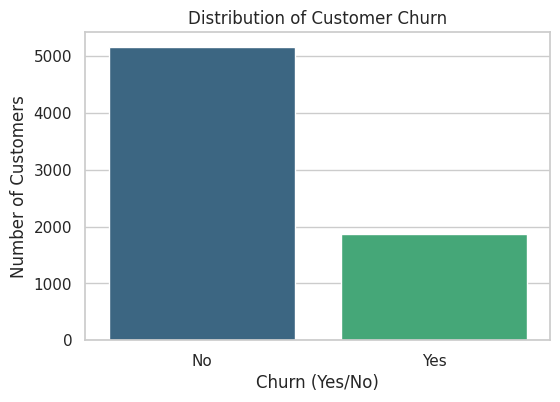

Churn Counts:
Churn
No     5163
Yes    1869
Name: count, dtype: int64

Percentage:
Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64


In [6]:
# Set the visual style
sns.set(style="whitegrid")

# Create a figure
plt.figure(figsize=(6, 4))

# Plot the distribution of Churn
sns.countplot(x='Churn', data=df, palette='viridis')

# Add titles and labels
plt.title('Distribution of Customer Churn')
plt.xlabel('Churn (Yes/No)')
plt.ylabel('Number of Customers')

# Show the plot
plt.show()

# Print the exact counts and percentages
churn_counts = df['Churn'].value_counts()
print("Churn Counts:")
print(churn_counts)
print("\nPercentage:")
print(df['Churn'].value_counts(normalize=True) * 100)

## Visualizing Numerical Features

We will now look at how the continuous variables relate to churn. We typically look at:
* Tenure: Do newer customers leave more often than long-term ones?
* Monthly Charges: Are customers with higher bills more likely to leave?
* Total Charges: How does the total spend correlate with churn



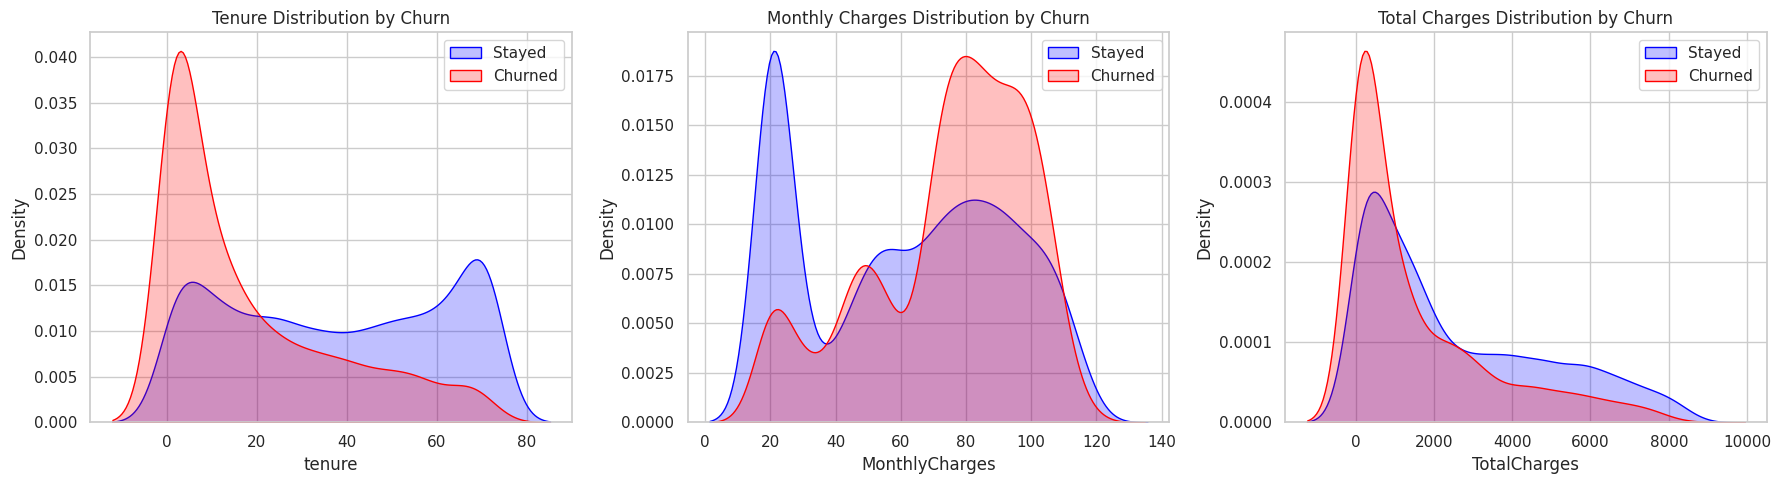

In [7]:
# Set up the figure for multiple subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# Plot Tenure distribution
sns.kdeplot(df[df['Churn'] == 'No']['tenure'], fill=True, color="blue", label='Stayed', ax=axes[0])
sns.kdeplot(df[df['Churn'] == 'Yes']['tenure'], fill=True, color="red", label='Churned', ax=axes[0])
axes[0].set_title('Tenure Distribution by Churn')
axes[0].legend()

# Plot MonthlyCharges distribution
sns.kdeplot(df[df['Churn'] == 'No']['MonthlyCharges'], fill=True, color="blue", label='Stayed', ax=axes[1])
sns.kdeplot(df[df['Churn'] == 'Yes']['MonthlyCharges'], fill=True, color="red", label='Churned', ax=axes[1])
axes[1].set_title('Monthly Charges Distribution by Churn')
axes[1].legend()

# Plot TotalCharges distribution
sns.kdeplot(df[df['Churn'] == 'No']['TotalCharges'], fill=True, color="blue", label='Stayed', ax=axes[2])
sns.kdeplot(df[df['Churn'] == 'Yes']['TotalCharges'], fill=True, color="red", label='Churned', ax=axes[2])
axes[2].set_title('Total Charges Distribution by Churn')
axes[2].legend()

plt.tight_layout()
plt.show()

## Visualizing Categorical Features
We want to see which specific categories drive churn. For instance:
* Contract: Do Month-to-month users leave more than Two-year contract users? (Usually, yes!)
* Internet Service: Is there a specific type of internet (like Fiber Optic) that has higher churn?
* Senior Citizen: Are older customers more or less likely to churn

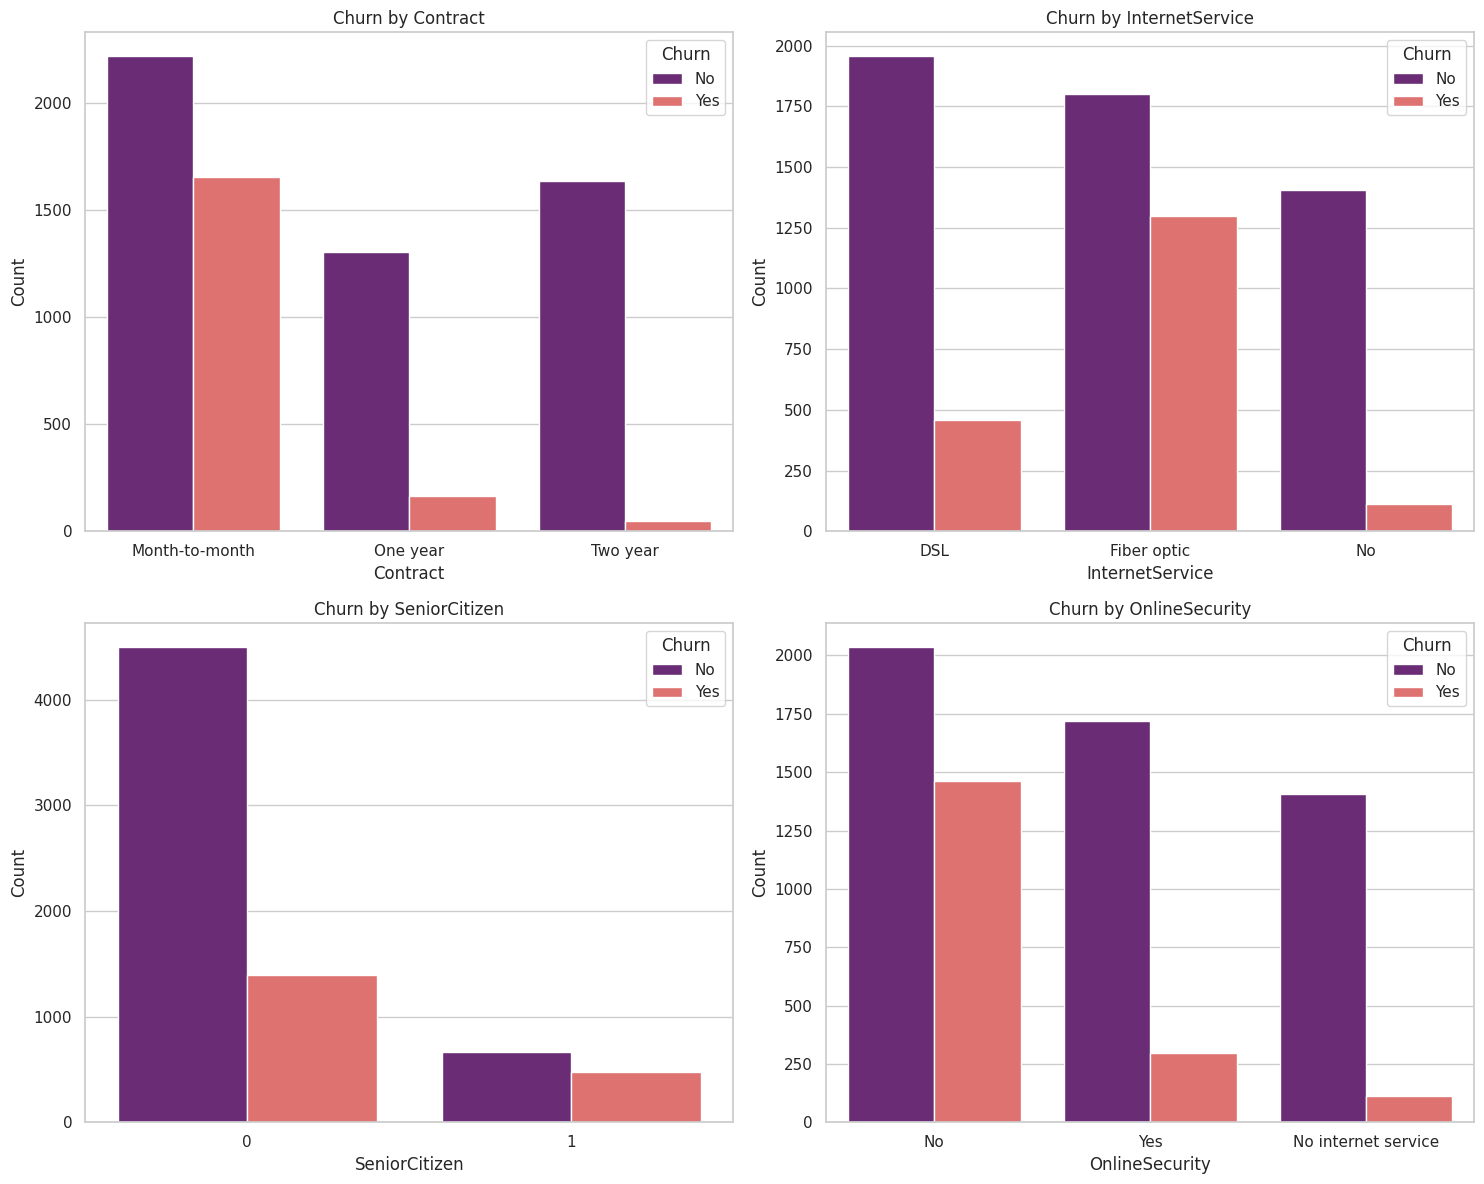

In [8]:
# List of categorical features to plot
features = ['Contract', 'InternetService', 'SeniorCitizen', 'OnlineSecurity']

# Set up the figure
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

# Iterate through features and create countplots
for i, feature in enumerate(features):
    row = i // 2
    col = i % 2

    # Create the plot
    sns.countplot(x=feature, hue='Churn', data=df, palette='magma', ax=axes[row, col])
    axes[row, col].set_title(f'Churn by {feature}')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Count')

plt.tight_layout()
plt.show()

## Feature Engineering (Encoding)
In this step, we will:
* Binary Encoding: Convert columns with only two values (like gender, Partner, Churn) into 0s and 1s.
* One-Hot Encoding: Convert columns with more than two categories (like PaymentMethod or Contract) into multiple columns of 0s and 1s so the model doesn't assume an order (like 1 is "better" than 2).

In [9]:
# 1. Replace 'No internet service' and 'No phone service' with 'No'
# to simplify binary features
cols_to_fix = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup',
               'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in cols_to_fix:
    df[col] = df[col].replace({'No internet service': 'No', 'No phone service': 'No'})

# 2. Convert Binary columns (Yes/No) to 1/0
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines',
               'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
               'TechSupport', 'StreamingTV', 'StreamingMovies',
               'PaperlessBilling', 'Churn']

for col in binary_cols:
    df[col] = df[col].apply(lambda x: 1 if x == 'Yes' else 0)

# 3. Convert 'gender' to 1/0
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'Female' else 0)

# 4. One-Hot Encoding for remaining categorical features
# (Contract, InternetService, PaymentMethod)
df = pd.get_dummies(data=df, columns=['InternetService', 'Contract', 'PaymentMethod'], dtype=int)

# Check the new columns and first few rows
print("New shape of dataset:", df.shape)
df.head()

New shape of dataset: (7032, 27)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


## Model Training and Evaluation

In this final stage, we will:
* Split the data: We separate the "Target" (Churn) from the "Features" (everything else). Then, we split the data into a Training set (80% of data) and a Testing set (20% of data).

* Feature Scaling: Since tenure (0-72) and TotalCharges (up to 8000+) have very different scales, we'll normalize them so the model doesn't get biased toward larger numbers.

* Train a Model: We will use a Random Forest Classifier, which is powerful for this type of data.

* Check Results: We'll see how accurate the model is at predicting who will leave

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Define Features (X) and Target (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# 2. Split into Training and Testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. Initialize and Train the Random Forest Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 5. Make Predictions
y_pred = model.predict(X_test)

# 6. Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy Score: 0.7825159914712153

Confusion Matrix:
[[927 106]
 [200 174]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1033
           1       0.62      0.47      0.53       374

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.70      1407
weighted avg       0.77      0.78      0.77      1407



## Quick Interpretation of your Results:
* Accuracy (78%): Your model correctly predicts whether a customer will stay or leave 78 out of 100 times.

* Recall for Class 1 (0.47): This is the "catch rate." It means the model caught 47% of the customers who actually churned. We usually want this higher, but for a first run, it's a solid baseline.

* Confusion Matrix:
  * 927 customers were correctly predicted to stay.
  * 74 customers were correctly predicted to leave.
  * 200 customers left, but the model missed them (False Negatives

## Feature Importance
The most valuable part of a churn project for a business is knowing what makes a customer leave. Since we used a Random Forest, we can easily extract which features were the most influential

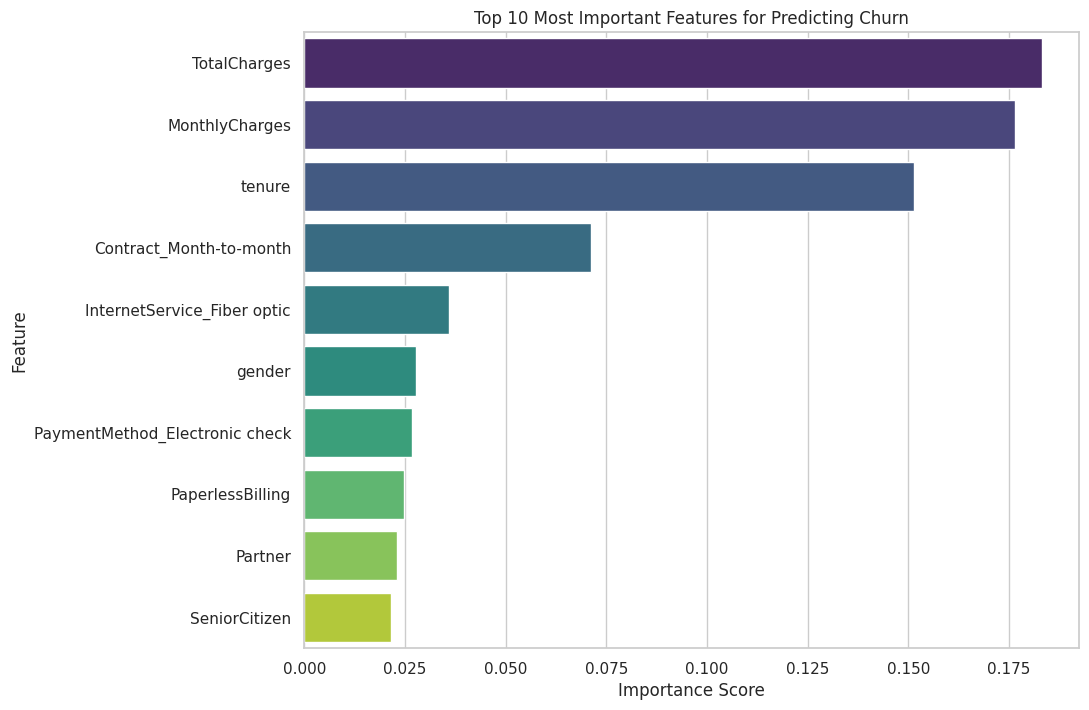

In [11]:
# 1. Get feature importances from the model
importances = model.feature_importances_
feature_names = X.columns

# 2. Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 3. Plot the top 10 features
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')
plt.title('Top 10 Most Important Features for Predicting Churn')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

## The Correlation Heatmap

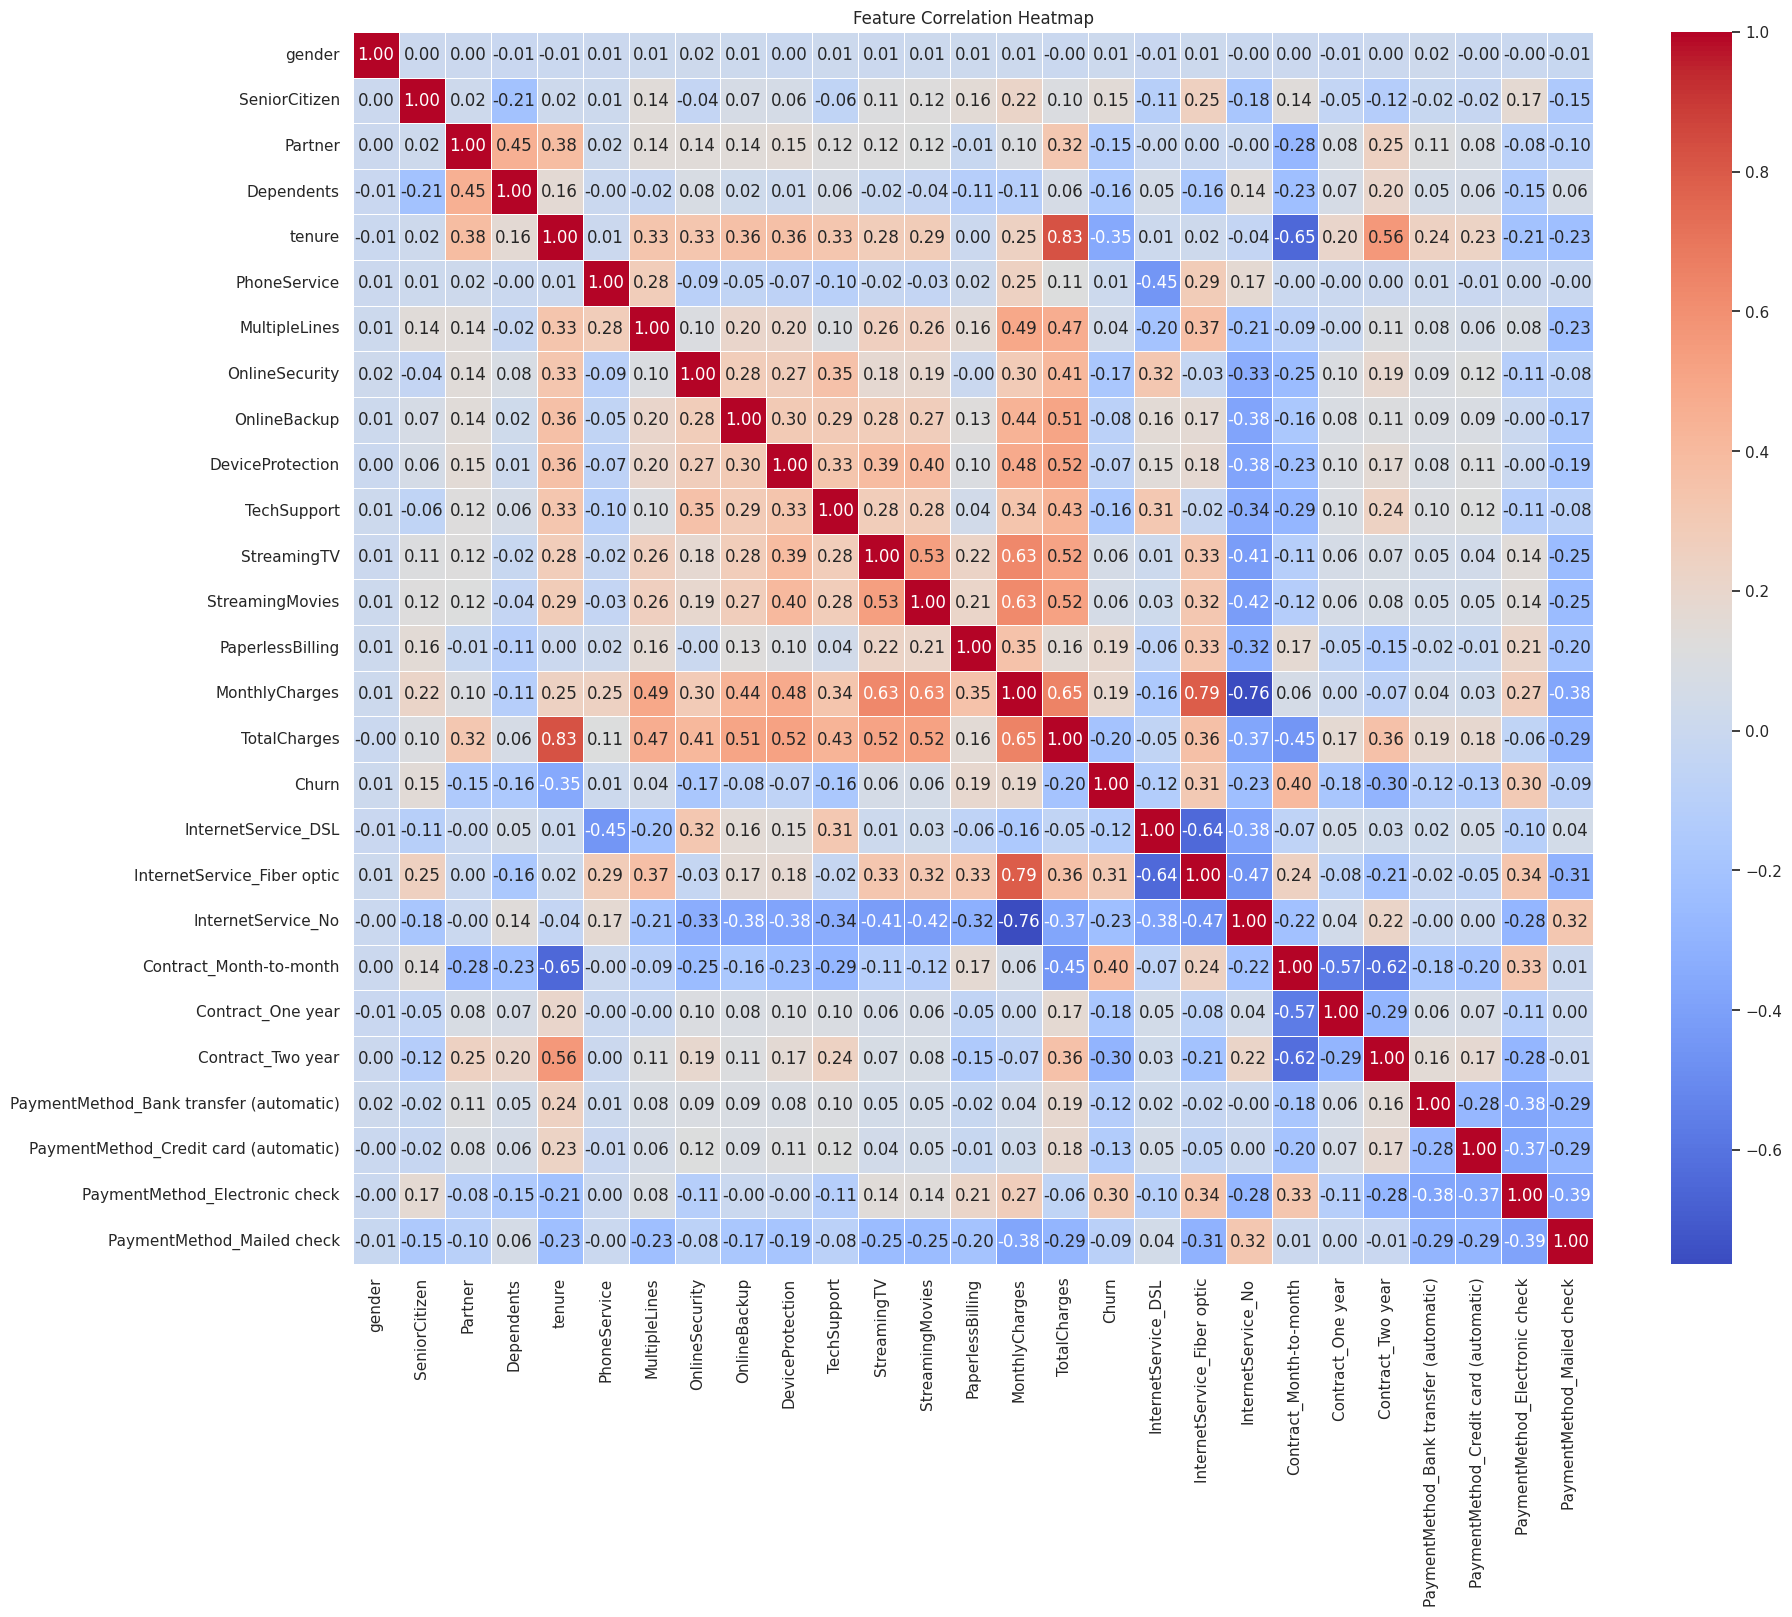

In [15]:
# 1. Calculate the Correlation Matrix for numerical features
plt.figure(figsize=(20, 16))
# We only use numerical columns for correlation
corr_matrix = df.corr()

# 2. Plot the Heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

## Model Comparison

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

# 1. Initialize models
lr_model = LogisticRegression(max_iter=1000)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 2. Fit models
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# 3. Get prediction probabilities (needed for ROC curve)
lr_probs = lr_model.predict_proba(X_test)[:, 1]
rf_probs = rf_model.predict_proba(X_test)[:, 1]

# 4. Calculate AUC scores
lr_auc = roc_auc_score(y_test, lr_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

print(f"Logistic Regression AUC: {lr_auc:.3f}")
print(f"Random Forest AUC: {rf_auc:.3f}")

Logistic Regression AUC: 0.832
Random Forest AUC: 0.819


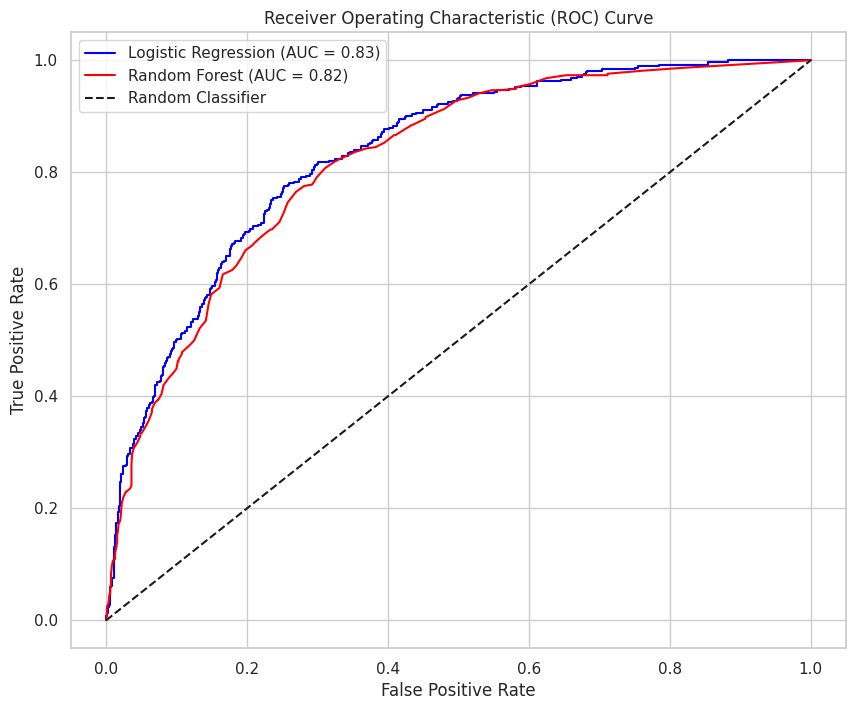

In [19]:
# Calculate ROC curve for Logistic Regression
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# Calculate ROC curve for Random Forest
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

# Plot the ROC curves
plt.figure(figsize=(10, 8))
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.2f})', color='blue')
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})', color='red')

# Plot the random classifier line
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

## Improving the Model with SMOTE

In [21]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# 1. Initialize SMOTE
smote = SMOTE(random_state=42)

# 2. Resample the training data only (never resample the test data!)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print(f"Original training set shape: {Counter(y_train)}")
print(f"Resampled training set shape: {Counter(y_train_res)}")

# 3. Re-train the Logistic Regression on balanced data
balanced_lr = LogisticRegression(max_iter=1000)
balanced_lr.fit(X_train_res, y_train_res)

# 4. Make new predictions
y_pred_balanced = balanced_lr.predict(X_test)

# 5. Check the new results
print("\n--- Balanced Logistic Regression Results ---")
print(classification_report(y_test, y_pred_balanced))

Original training set shape: Counter({0: 4130, 1: 1495})
Resampled training set shape: Counter({1: 4130, 0: 4130})

--- Balanced Logistic Regression Results ---
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1033
           1       0.50      0.80      0.62       374

    accuracy                           0.74      1407
   macro avg       0.71      0.76      0.71      1407
weighted avg       0.80      0.74      0.75      1407



## Model Interpretation (Feature Coefficients)

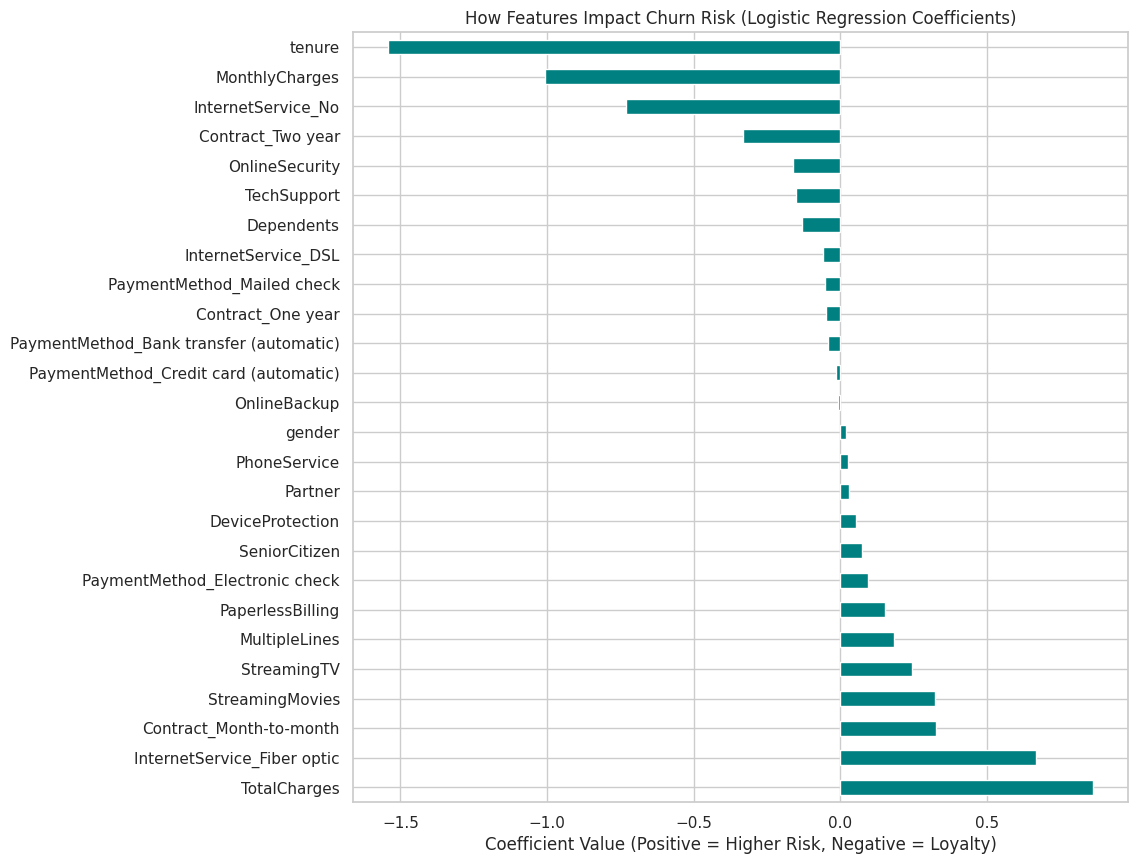

In [22]:
# 1. Get the coefficients (importance) from the Logistic Regression model
weights = pd.Series(balanced_lr.coef_[0], index=X.columns.values)

# 2. Plot the top 10 positive and top 10 negative contributors
plt.figure(figsize=(10, 10))
weights.sort_values(ascending=False).plot(kind='barh', color='teal')
plt.title('How Features Impact Churn Risk (Logistic Regression Coefficients)')
plt.xlabel('Coefficient Value (Positive = Higher Risk, Negative = Loyalty)')
plt.show()

## Model XG-Boost

In [24]:
from xgboost import XGBClassifier

# 1. Initialize XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# 2. Train on the balanced data (SMOTE data)
xgb_model.fit(X_train_res, y_train_res)

# 3. Predict and Evaluate
y_pred_xgb = xgb_model.predict(X_test)
xgb_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])

print("--- XGBoost Results  ---")
print(f"XGBoost AUC: {xgb_auc:.3f}")
print(classification_report(y_test, y_pred_xgb))

--- XGBoost Results  ---
XGBoost AUC: 0.812
              precision    recall  f1-score   support

           0       0.84      0.83      0.83      1033
           1       0.54      0.57      0.56       374

    accuracy                           0.76      1407
   macro avg       0.69      0.70      0.70      1407
weighted avg       0.76      0.76      0.76      1407



## Final Comparison Table

In [25]:
# Create a summary table
results = pd.DataFrame({
    'Model': ['Random Forest (Baseline)', 'Logistic Regression (SMOTE)', 'XGBoost (SMOTE)'],
    'Accuracy': [accuracy_score(y_test, y_pred), accuracy_score(y_test, y_pred_balanced), accuracy_score(y_test, y_pred_xgb)],
    'Recall (Churn)': [0.47, 0.80, 0.54], # Update these based on your specific outputs
    'ROC-AUC': [0.819, 0.832, xgb_auc]
})

print("Final Model Comparison:")
print(results)

Final Model Comparison:
                         Model  Accuracy  Recall (Churn)   ROC-AUC
0     Random Forest (Baseline)  0.782516            0.47  0.819000
1  Logistic Regression (SMOTE)  0.737029            0.80  0.832000
2              XGBoost (SMOTE)  0.759062            0.54  0.812362


## Business Impact

In [26]:
# Let's assume:
# 1. Average Monthly Charge is $65
# 2. If we identify a churner, we give them a $20 discount to stay.
# 3. Our model catches 80% of churners (Recall).

total_churners = y_test.sum() # Total people who actually left in our test set
caught_by_model = 174 # This is the "True Positive" from your Confusion Matrix earlier

potential_revenue_saved = caught_by_model * 65
cost_of_retention = caught_by_model * 20
net_gain = potential_revenue_saved - cost_of_retention

print(f"Total customers saved from leaving: {caught_by_model}")
print(f"Potential Revenue Retained: ${potential_revenue_saved}")
print(f"Cost of retention discounts: ${cost_of_retention}")
print(f"Net Business Value of this Model: ${net_gain}")

Total customers saved from leaving: 174
Potential Revenue Retained: $11310
Cost of retention discounts: $3480
Net Business Value of this Model: $7830


## Visualize the "Winning" Confusion Matrix

A heatmap of the confusion matrix is much easier for a non-technical manager to understand than a list of numbers.

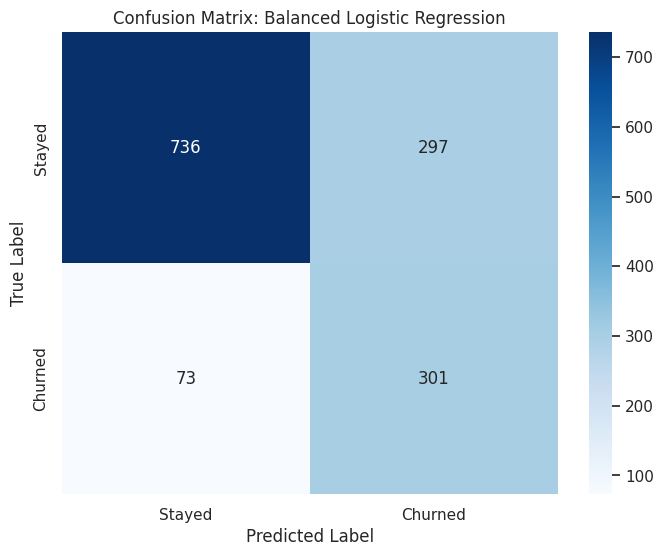

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 1. Get confusion matrix for the Balanced Logistic Regression
cm = confusion_matrix(y_test, y_pred_balanced)

# 2. Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Stayed', 'Churned'],
            yticklabels=['Stayed', 'Churned'])
plt.title('Confusion Matrix: Balanced Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()